In [1]:
! pip install numpy
! pip install matplotlib
! pip install scipy

import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as const
import scipy.special

# 3 OFDM

## Exercise 7: Mulitcarrier


Assume we have a BPSK multicarrier transmission over an AWGN channel, where the ambiguity function between transmit and receive filter reads 
$$
A\left( t,  f\right) = \begin{cases}
                                    \frac{\sin \left(\pi  f T \left(1-\frac{| t|}{T}\right)\right)}{\pi  f T}, \quad | t| < T \\
				    0, \quad \text{else}
                                   \end{cases}
$$

### a) Sketch the ambiguity function for $t=0$, $A\left(0, f\right)$

$$A(0,f) = \frac{\sin \left(\pi  f T \right)}{\pi  f T} = sinc(\pi f T)$$

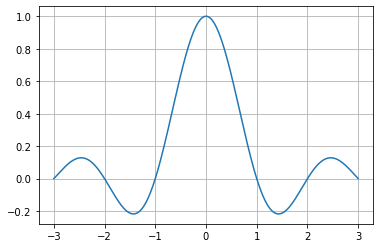

In [2]:
f = np.arange(-3,3, 10**-3)
T = 1

signal = np.sinc(f*T)

plt.plot(f, signal)
plt.grid(True)

### b) Sketch the ambiguity function for $f=0$ ,$A\left( t, 0 \right)$.

Derivation on the board

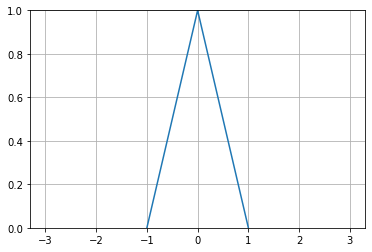

In [3]:
t = np.arange(-3,3,10**-3)
signal = (1 - abs(t)/T)

plt.plot(t, signal)
plt.ylim(0,1)
plt.grid(True)


### c) From subitem a) and b) show graphically that the first Nyquist condition is fulfilled in frequency and time domain

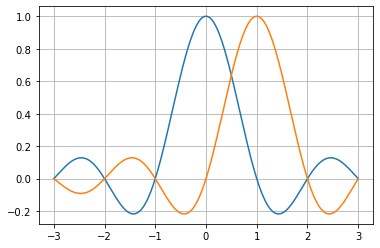

In [4]:
f = np.arange(-3,3, 10**-3)
fs = 1
T = 1

signal_1 = np.sinc(f*T)
signal_2 = np.sinc((f-fs)*T)

plt.plot(f, signal_1)
plt.plot(f, signal_2)
plt.grid(True)

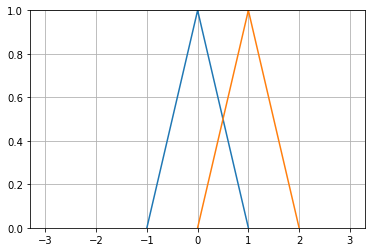

In [5]:
t = np.arange(-3,3,10**-3)
ts = 1

signal_1 = (1 - abs(t)/T)
signal_2 = (1 - abs(t-ts)/T)

plt.plot(t, signal_1)
plt.plot(t, signal_2)
plt.ylim(0,1)
plt.grid(True)


### d)  What is the name of this multicarrier system?

Its OFDM

### e) Determine the subcarrier distance $\Delta f$ such that the system is orthogonal in the frequency domain.

We now assume that the receiver moves towards transmitter with a speed of $50 \frac{\text{m}}{{s}}$ The carrier frequency is $f_c=2.4 \cdot 10^9 \text{Hz}$ and the symbol duration is $T=10^{-3} \text{s}$. The number of subcarriers is set to $N=2$.

In [6]:
T = 10**-3
delta_f = 1/T

print("Delta f: ", delta_f)

Delta f:  1000.0


### f) Determine the Doppler shift, with the speed of light $c_0 = 3\cdot 10^{8}\frac{\text{m}}{\text{s}}$

In [7]:
v_ms = 50
fc = 2.4*10**9
c0 = const.c

fd = fc*v_ms/c0

print("Doppler Frequency: ",fd)

Doppler Frequency:  400.2769142377825


### g) Determine the Signal to inter Carrier Interference ratio if we assume that the Doppler shift can not be compensated at the receiver.

In [8]:
S = 0.756
I = 0.5046

SNR_lin = S**2/I**2
SNR_db = 10*np.log10(SNR_lin)

print("SNR in linear scale: ", SNR_lin)
print("SNR in log scale: ", SNR_db)

SNR in linear scale:  2.244652408307306
SNR in log scale:  3.5114909863930137


## Exercise 8 : OFDM Error Probability

An OFDM system with $2048$ active subcarriers is used for wireless transmission. The interval between two subcarriers is $250\text{Hz}$ and the guard interval has a length of $2\text{ms}$. BPSK modulation is used for each subcarrier.

### a) Determine the bandwith and transmission rate of the entire system.

In [9]:
N = 2048
delta_f = 250
T_g = 2*10**-3
M =2    #BPSK

B = N * delta_f
print("Bandwidth: ", B)

#R = (np.log2(M)*N)/(T_s+T_g)

T_s = 1/delta_f 
R = (np.log2(M)*N)/(T_s+T_g)
print("Data rate: ", R)

Bandwidth:  512000
Data rate:  341333.3333333333


### b) An IDFT with the length $4096$ is used to create the OFDM signal. Determine the sampling frequency of the output signal and how many samples fall into the guard interval.

In [10]:
N_idfft = 4096
T_s = 4*10**-3
T_g = 2*10**-3

N_G = T_g/T_s*N_idfft

print("Samples: ", N_G)

f_delta = N_idfft/T_s

print("Sampling frequency: ", f_delta)

Samples:  2048.0
Sampling frequency:  1024000.0


### c) The required bandpass energy of an OFDM symbol at the transmitter is $E_{OFDM}=1.4\text{Ws}$. White Gaussian noise with a power spectrum of $N_0/2 = 6 \cdot 10^{-5}\text{Ws}$ is added in the bandpass. Determine the $E_b/N_0$ in dB. Specify the bit error rate of the transmission system. Calculate the average power emitted by the transmitter.

In [11]:
E_OFDM = 1.4
N0_2 = 6*10**-5
N0 = 2* N0_2

Eb = E_OFDM/(np.log2(M)*N)
print("Energy per Bit: ", Eb)

Eb_N0 = Eb/N0
Eb_N0_dB = 10*np.log10(Eb_N0)

print("SNR in linear scale: ",Eb_N0)
print("SNR ind log scale: ", Eb_N0_dB)

gamma_g = 1-T_g/(T_g+T_s)
print("beta = gamma_g^2 = ", gamma_g)


Energy per Bit:  0.00068359375
SNR in linear scale:  5.696614583333332
SNR ind log scale:  7.5561683732682
beta = gamma_g^2 =  0.6666666666666667


In [12]:
Pb = 0.5*scipy.special.erfc(np.sqrt(Eb_N0*gamma_g))
print("OFDM system bit error rate: ", Pb)

OFDM system bit error rate:  0.002925730807440946


In [13]:
Tx_power = E_OFDM/(T_g+T_s)
print("OFDM system power: ", Tx_power)

OFDM system power:  233.33333333333331


## Exercise 9: OFDM WLAN

An OFDM system is used for a wireless computer network (WLAN, Wireless Local Area Network). A transmission rate of $32\text{Mbit/s}$ is required. The maximum length of the channel impulse response is $800\text{ns}$.

### a) Determine the distance of the subcarriers, if the guard interval is $20\text{\%}$ of the overall symbol duration.

$$T_G = \tau_{max} = 0.2 of T$$

In [14]:
tau_max = 800*10**-9
T_g = tau_max

T = (T_g/20)*100 
print("Total symbol duration: ", T)

T_s = T - T_g
print("Core symbol duration: ", T_s)

delta_f = 1/T_s
print("Subcarrier spacing: ", delta_f)



Total symbol duration:  4e-06
Core symbol duration:  3.2e-06
Subcarrier spacing:  312500.0


### b) Calculate the S/N loss due to the insertion of the guard interval (Violation of the matched-filter criterion!)

In [15]:
beta = 1/(1+(T_g/T_s))

beta_db = 10*np.log10(beta)

print("Efficiencz in dB: ", beta_db)

Efficiencz in dB:  -0.969100130080564


### c) The bandwidth of the channel is $20\text{MHz}$. Determine the number of subcarriers for the transmitted signal.

In [16]:
B = 20*10**6
# B = delta_f * N

N = B / delta_f

print("Number of Subcarrier: ", N)

Number of Subcarrier:  64.0


### d) From the modulation methods BPSK, QPSK, 8PSK, 16QAM, and 64QAM choose the one that just reaches the required transmission rate. Give a calculation for justyfication.

In [17]:
Rb = 32*10**6
# Rb = N*np.log2(M)/T

M_star = Rb * T_s/N

print("ld(M) = ", M_star)
 
M = np.ceil(M_star)

print("M should be choosen to: ", M)
print("Resulting in a QPSK Modulation")


ld(M) =  1.5999999999999999
M should be choosen to:  2.0
Resulting in a QPSK Modulation


## Exercise 10: OFDM Modulator


An OFDM-transmission is realzed with $N=2$ subcarriers. The complexe envelope of the transmit signal reads
$$ s(k)=\sum\limits_{n=0}^{N-1}d(n)e^{j2\pi nk/N} $$
A bandwidth of $B=20$~MHz is available. The subcarriers are modulated with BPSK. 

### a) Determine the subcarrier spacing and core symbol duration of the system.

In [18]:
N = 2
B = 20 * 10**6

M = 2

delta_f = B/N

T_s = 1/delta_f

print("Subcarrier spacing: ", delta_f)
print("Core symbol duration: ", T_s)

Subcarrier spacing:  10000000.0
Core symbol duration:  1e-07


### b) Determine the maximal possible data rate.

The receiver performs a DFT to recover the signal. The DFT is given as 
$$x(m)=\frac{1}{N}\sum\limits_{k=0}^{N-1}r(k)e^{-j2\pi km/N}$$

In [19]:
Rb = (N*np.log2(M))/T_s

print(" Data rate at ideal channel condition: ", Rb)

 Data rate at ideal channel condition:  20000000.0


### c) Give an intuitive proof that the transmission is orthogonal by calculating $x(0)$ and $x(1)$ at the output of the DFT block. Give an explenation what is meant by orthogonal transmission is this context. 

Will bill calculate at the board

## Exercise 11: OFDM LTE

The upcoming enhancement of the UMTS system is currently specified under the name Long Term Evolution (LTE), which applies the transmission scheme OFDM. For this technology a maximum bandwidth of $30.72\text{MHz}$ and a FFT length of $2048$ are specified. The duration of the OFDM core symbol is specified as $66.67\mu\text{s}$, the duration of the cyclic prefix is $16.67\mu\text{s}$.

### a) Determine the subcarrier spacing $\Delta f$ and the bandwidth efficiency $\beta$. What is the maximum allowable delay spread of a channel to guarantee that no inter-symbol interference occurs?

In [20]:
B = 30.72*10**6
N = 2048
T_s = 66.67*10**-6
T_g = 16.67*10**-6

In [21]:
delta_f = B/N

print("Subcarrier spacing: ",delta_f)

beta = 1/(1+(T_g/T_s))

print("Efficiency: ", beta)

Subcarrier spacing:  15000.0
Efficiency:  0.7999760019198463


$$\tau_{max} < T_G = 16.67 ms $$

### b) How many subcarriers must be switched off or allocated with zeros, if a maximum bandwidth of $18\text{MHz}$ must not be exceeded? Determine the maximum data rate that can be transmitted with this bandwidth, if $64$-QAM modulation is applied.

In [22]:
B_max = 18*10**6

N_r = B_max/delta_f
print("Used Subcarriers: ", N_r)

N_off = N-N_r
print("Subcarriers switched off: ", N_off)

Used Subcarriers:  1200.0
Subcarriers switched off:  848.0


In [23]:
M = 64
T = T_s + T_g

Rb = np.log2(M)*N_r/T

print("Achievable data rate: ", Rb)

Achievable data rate:  86393088.55291577


### c) To create the OFDM signal at this bandwidth an IFFT of length $2048$ is used. Determine the sampling frequency at the output of the IFFT and the number of sampling points that appear in the guard interval.

In [24]:
N_FFT = 2048

f_A = N_FFT/T_s

print("Sampling frequency: ", f_A)

N_g = T_g/T_s * N_FFT

print("Sampling points in the Guard interval: ", N_g)

Sampling frequency:  30718464.076796163
Sampling points in the Guard interval:  512.0767961601921


## Exercise 12: OFDM

An OFDM system is operating within a bandwidth of $B=6\text{MHz}$ on $N_c=16$ subcarriers with a bandwidth efficiency of $\beta=0.8$. The transmitted data is modulated with a $8$-PSK.

### a) Determine the data rate $R$ of the system.

In [25]:
B = 6*10**6
N_c = 16
beta = 0.8

M = 8 #8-PSK

Equation for Data rate:
$$R = \dfrac{ld(M)\cdot N}{T}$$

with $$ T = T_s + T_G$$
    with $$ T_s = 1/\Delta f $$
        with $$ \Delta f = \dfrac{B}{N}$$

In addition:
$$ T_G = (\dfrac{1}{\beta}-1)\cdot T_s $$

In [26]:
delta_f = B /N_c

T_s = 1 / delta_f

T_g = (1/beta-1) * T_s

T = T_s+T_g

print("Subcarrier Spacing: ", delta_f)
print("Core symbol duration: ", T_s)
print("Guard time: ", T_g)
print("Total symbol duration: ", T)


Subcarrier Spacing:  375000.0
Core symbol duration:  2.666666666666667e-06
Guard time:  6.666666666666667e-07
Total symbol duration:  3.3333333333333333e-06


With that given:

In [27]:
R = np.log2(M)*N_c/T
print("Data rate: ", R)

Data rate:  14400000.0


### b) How large is the maximum delay $\tau_{\mathrm{max}}$ for the channel? Justify your calculations.

$$\tau_{max} = T_G = T-T_s = \dfrac{N_c}{B}(\dfrac{1}{\beta}-1)$$

In [28]:
tau_max = N_c/B*((1/beta)-1)

print("Maximum delay: ", tau_max)

Maximum delay:  6.666666666666667e-07


### c) How many of the $16$ subcarriers are needed to achieve the given data rate?

Utilizing the same system parameters, the transmission now uses a data rate of $R=13.5\text{Mbit/s}$.

In [29]:
R = 13.5*10**6

N = R*T/np.log2(M)

print("Active Subcarrier: ", N)

Active Subcarrier:  15.0


### d) Which subcarriers do you suggest to be switched off?


A channel estimation yields the impulse response given as:
$$h(k)=1 \cdot \delta(k)+0.5 \cdot \delta(k-1)$$

Hint: The center frequency of the first subcarrier is located at $\Omega=0$ .

Will be calculated at the board

## Exercise 13: OFDM

An OFDM system with a minimum bitrate of $R_b=10\text{Mbit/s}$ is to be realized. Due to the channel's frequency selectivity the subcarrier spacing may not exceed $\Delta f=10$ kHz. An SNR loss of  $\gamma^2=-1$ dB due to the cyclic prefix is allowed.

### a) Determine the maximal duration of the cyclic prefix.

In [30]:
Rb = 10*10**6
delta_f = 10*10**3
M = 4
gamma_sq_db = -1


beta = 10**(gamma_sq_db/10)

In [31]:
T_s = 1/delta_f

T_g = ((1/beta) -1)*T_s

print("Core symbol duration: ", T_s)
print("Guard interval: ", T_g)

Core symbol duration:  0.0001
Guard interval:  2.589254117941673e-05


### b) Each subcarrier is modulated using QPSK. The cyclic prefix has the duration calculated in problem a). Determine the number of subcarriers that are required to achieve the desired bitrate.

In [32]:
N = Rb * ((T_s+T_g)/np.log2(M))
print("Minimum number of subcarrier: ", N)
N = np.ceil(N)
print("Number of active subcarrier: ", N)


Minimum number of subcarrier:  629.4627058970838
Number of active subcarrier:  630.0


### c) Implementation constraints demand an FFT length, which is the number of subcarriers rounded to the next largest power of two. Which sampling frequency do you need to provide now?

In [33]:
N = np.log2(N)
N = np.ceil(N)
N_FFT = 2**N

print("Number of subcarriers: ", N_FFT)

Number of subcarriers:  1024.0


In [34]:
f_delta = N_FFT/T_s

print("Subcarrier spacing: ", f_delta)

Subcarrier spacing:  10240000.0


### d) Determine the maximal data rate when the number of subcarriers is identical to the FFT length in problem c).

In [35]:
Rb = N_FFT * np.log2(M)/(T_s +T_g)

print('Maximal data rate: ', Rb)

Maximal data rate:  16267842.247153282


### e) The channel transfer function is to be estimated via scattered pilot symbols. Determine the maximal spacing $\Delta n_\text{Pi}$ between subsequent pilot symbols in the frequency direction, if the maximal echo delay of the channel $\tau_\text{max}$ equals the guard duration.

$$ \dfrac{\Delta n_{pi}}{T_S} < \dfrac{1}{\tau_{max}} $$

In [36]:
delta_npi = T_s/T_g
print('Actual number of pilot carrier: ', delta_npi)
delta_npi = np.ceil(delta_npi)
print('Minimal number of pilot carrier: ', delta_npi)

Actual number of pilot carrier:  3.862116093861617
Minimal number of pilot carrier:  4.0
